In [1]:
import pandas as pd

In [11]:
df = pd.read_csv(r"C:\Users\user\OneDrive\Documents\Dataset\New Portfolio\Sneakers Sales\sneakers.csv")
df

,Date,Product Name,Product Type,Brand,Gender,Category,Country,Quantity,Unit Price ($),Amount ($),Payment Mode
0,2022-05-27,Fear of God Essentials Tee,T-shirt,Essentials,Unisex,Limited Edition,Japan,5,141.82,709.10,Card
1,2022-08-22,Yeezy Boost 350,Sneakers,Adidas,Unisex,Streetwear,USA,2,267.34,534.68,Cash on Delivery
2,2022-04-03,Nike Dunk Low,Sneakers,Nike,Women,Limited Edition,Germany,1,292.00,292.00,Cash on Delivery
3,2022-07-13,Nike Tech Fleece,Hoodie,Nike,Men,Limited Edition,USA,4,245.44,981.76,Cash on Delivery
4,2022-08-25,Jordan 1 High,Sneakers,Nike,Women,Casual,Australia,2,184.51,369.02,Cash on Delivery
...,...,...,...,...,...,...,...,...,...,...,...
348,2022-04-08,Jordan 1 High,Sneakers,Nike,Men,Casual,India,5,94.25,471.25,Wallet
349,2022-08-03,Nike Tech Fleece,Hoodie,Nike,Women,Casual,Germany,5,259.00,1295.00,Card
350,2022-05-05,Puma Joggers,Joggers,Puma,Women,Casual,Germany,4,299.73,1198.92,Cash on Delivery
351,2022-05-19,Adidas Ultraboost,Sneakers,Adidas,Men,Casual,Canada,5,71.26,356.30,Cash on Delivery


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            353 non-null    object 
 1   Product Name    353 non-null    object 
 2   Product Type    353 non-null    object 
 3   Brand           353 non-null    object 
 4   Gender          353 non-null    object 
 5   Category        353 non-null    object 
 6   Country         353 non-null    object 
 7   Quantity        353 non-null    int64  
 8   Unit Price ($)  353 non-null    float64
 9   Amount ($)      353 non-null    float64
 10  Payment Mode    353 non-null    object 
dtypes: float64(2), int64(1), object(8)
memory usage: 30.5+ KB


In [18]:
df.describe

<bound method NDFrame.describe of           Date                Product Name Product Type       Brand  Gender  \
0   2022-05-27  Fear of God Essentials Tee      T-shirt  Essentials  Unisex   
1   2022-08-22             Yeezy Boost 350     Sneakers      Adidas  Unisex   
2   2022-04-03               Nike Dunk Low     Sneakers        Nike   Women   
3   2022-07-13            Nike Tech Fleece       Hoodie        Nike     Men   
4   2022-08-25               Jordan 1 High     Sneakers        Nike   Women   
..         ...                         ...          ...         ...     ...   
348 2022-04-08               Jordan 1 High     Sneakers        Nike     Men   
349 2022-08-03            Nike Tech Fleece       Hoodie        Nike   Women   
350 2022-05-05                Puma Joggers      Joggers        Puma   Women   
351 2022-05-19           Adidas Ultraboost     Sneakers      Adidas     Men   
352 2022-07-17               Nike Dunk Low     Sneakers        Nike   Women   

            Categ

In [16]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y/%m/%d').dt.normalize()

In [17]:
df.dtypes

Date              datetime64[ns]
Product Name              object
Product Type              object
Brand                     object
Gender                    object
Category                  object
Country                   object
Quantity                   int64
Unit Price ($)           float64
Amount ($)               float64
Payment Mode              object
dtype: object

In [5]:
df.isnull().sum()

Date              0
Product Name      0
Product Type      0
Brand             0
Gender            0
Category          0
Country           0
Quantity          0
Unit Price ($)    0
Amount ($)        0
Payment Mode      0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [22]:
# Hitung Q1, Q3, dan IQR
Q1 = df[['Quantity', 'Unit Price ($)', 'Amount ($)']].quantile(0.25)
Q3 = df[['Quantity', 'Unit Price ($)', 'Amount ($)']].quantile(0.75)
IQR = Q3 - Q1

# Filter baris yang mengandung outlier
outliers = df[
    ((df[['Quantity', 'Unit Price ($)', 'Amount ($)']] < (Q1 - 1.5 * IQR)) |
     (df[['Quantity', 'Unit Price ($)', 'Amount ($)']] > (Q3 + 1.5 * IQR))).any(axis=1)
]

# Cetak hasil outlier
print("Jumlah outlier terdeteksi:", len(outliers))
print(outliers[['Date', 'Product Name', 'Quantity', 'Unit Price ($)', 'Amount ($)']])


Jumlah outlier terdeteksi: 0
Empty DataFrame
Columns: [Date, Product Name, Quantity, Unit Price ($), Amount ($)]
Index: []


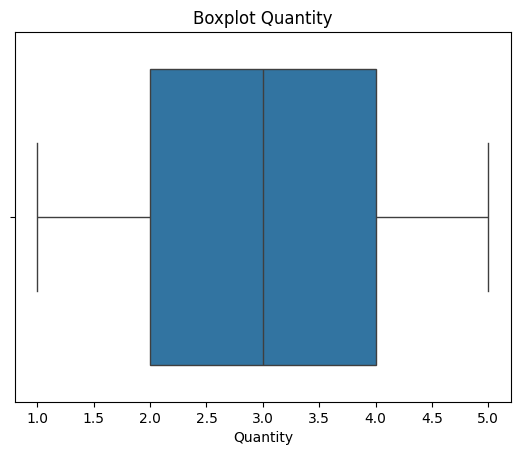

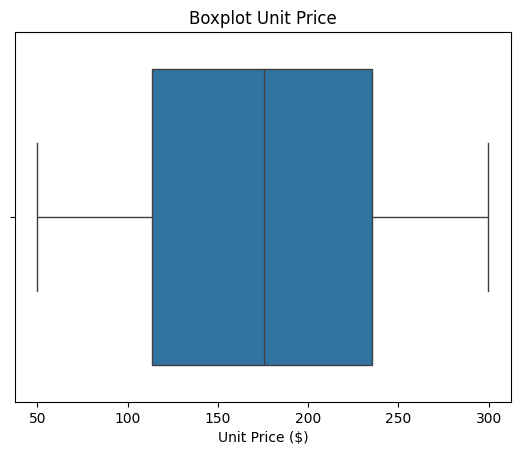

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt


# Boxplot untuk Quantity
sns.boxplot(x=df['Quantity'])
plt.title('Boxplot Quantity')
plt.show()

# Boxplot untuk Unit Price
sns.boxplot(x=df['Unit Price ($)'])
plt.title('Boxplot Unit Price')
plt.show()


In [13]:
df.to_csv('sneakers.csv', index=False)